In [2]:
#Data Pre-procesing Step
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm


#importing datasets
data_set= pd.read_csv("/content/bank_transactions.csv")
data_set.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5


In [3]:
data_set.isnull().sum()

,0
TransactionID,0
CustomerID,1
CustomerDOB,450
CustGender,122
CustLocation,24
CustAccountBalance,348
TransactionDate,1
TransactionTime,1
TransactionAmount (INR),1


In [6]:
df=data_set.dropna()

In [8]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
x= df.iloc[:, [5,7]].values
y= df.iloc[:, 8].values

In [10]:
print("independent data\n",x)
print("\ndependent data\n",y)

independent data
 [[ 17819.05 143207.  ]
 [  2270.69 141858.  ]
 [ 17874.44 142712.  ]
 ...
 [ 32793.39 103050.  ]
 [   383.34 103708.  ]
 [ 42616.12 105806.  ]]

dependent data
 [2.5000e+01 2.7999e+04 4.5900e+02 ... 5.0000e+02 4.9000e+01 1.0000e+03]


In [12]:
#Seprating x and y DataFrame for test and train.
#split the data in to train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [13]:
#check shape of the data
print("x_train and x_test dataset shape",x_train.shape,x_test.shape)
print("y_train and y_test dataset shape",y_train.shape,y_test.shape)

x_train and x_test dataset shape (105059, 2) (26265, 2)
y_train and y_test dataset shape (105059,) (26265,)


### **LINEAR REGRESSION**

In [14]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
#Printing R2 value, coefficient and intercept.
print("R2 value",regressor.score(x_train,y_train))
print("coefficient",regressor.coef_)
print("intercept",regressor.intercept_)

R2 value 0.0025955497643416203
coefficient [0.00042031 0.00038293]
intercept 1480.895030346776


In [16]:
# find actual vs prediction
y_pred = regressor.predict(x_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = pred.head(10)
df1

,Actual,Predicted
0,695.00,1540.123897
1,818.00,1526.875221
2,751.55,1544.420704
3,24.00,1516.159869
4,1045.00,1872.927104
5,335.00,1575.148659
6,1000.00,1546.363778
7,1734.00,1542.530851
8,598.13,1564.629811
9,2000.00,1575.243240


In [17]:
# summarize the fit of the model
mse = np.mean((df1.Predicted-df1.Actual)**2)
print( "coefficient :",regressor.coef_)
print("\n intercepter :",regressor.intercept_)
print("\n mse :",mse)
print("\n final score",regressor.score(x_test,y_test))

coefficient : [0.00042031 0.00038293]

 intercepter : 1480.895030346776

 mse : 774506.9498219879

 final score 0.0024127564964770976


In [19]:
#Print final summary using OLS model.
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           3.20e-74
Time:                        06:38:21   Log-Likelihood:            -1.3340e+06
No. Observations:              131324   AIC:                         2.668e+06
Df Residuals:                  131321   BIC:                         2.668e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1495.9474     57.210     26.148      0.0

## **RANDOM FOREST**

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=10,criterion="squared_error")
regressor.fit(x_train , y_train)

RandomForestRegressor(n_estimators=10)

In [28]:
y_pred_df= regressor.predict(x_test)

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mse=mean_squared_error(y_test,y_pred_df)
print(f"Mean Square Error:{mse}")


Mean Square Error:35054977.984018914


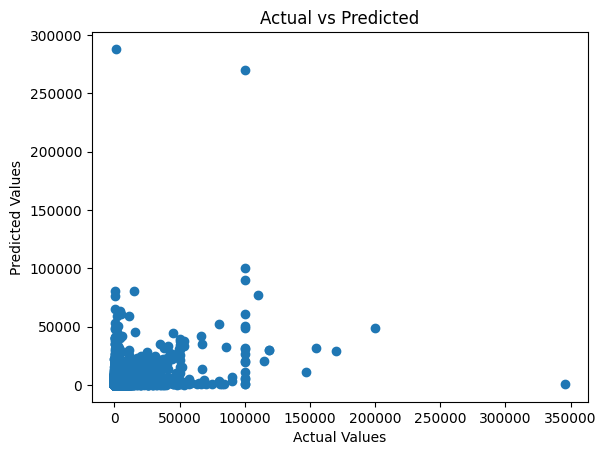

In [32]:
plt.scatter(y_test,y_pred_df)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()